In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
import re
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
tickets = pd.read_csv('data/hacknight_ticket_sample_data_2015.csv', low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [6]:
tickets_geo = pd.read_csv('data/hacknight_sample_data_geocode.csv', low_memory=False)


First, I want to focus on people who are got a notice that they are on the boot list. So I'm filtering the dataset to only have those with "SEIZ" for the notice level.

In [7]:
tickets_SEIZ_only = tickets[tickets.notice_level == "SEIZ"]
tickets_SEIZ_only

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
1,65543631,2015-01-10 17:09:00,423 N LARAMIE,13d93046fb2c3bc2d79baa8647d620d0c5a65fdc223cb9...,IL,PAS,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,15,CPD,CHRY,60,120,146.40,0.00,Notice,2015-01-28,SEIZ,NaN,5109291290,16391,"400 n laramie, chicago, il"
4,9189537354,2015-10-28 16:26:00,2410 N MONTICELLO AV,f0858c838c8cabda4e8fd3e0425a6c330a76e006f9de01...,IL,PAS,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,TOYT,50,100,0.00,100.00,Paid,2016-01-27,SEIZ,NaN,5168404170,1407,"2400 n monticello av, chicago, il"
8,66116401,2015-08-15 22:46:00,3100 W FILLMORE,1a6f9bfd652493a4bb6d0beeb5fa3e7872a38983c57aa3...,IL,PAS,606232113,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",11,CPD,BUIC,200,400,488.00,0.00,Notice,2016-10-03,SEIZ,NaN,5193679090,19533,"3100 w fillmore, chicago, il"
9,66291855,2015-11-24 23:24:00,6537 S CALUMET,8c4c93c8038966384c51d4e68416f3cb69a8e4631524ee...,WI,PAS,535113434,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,OLDS,60,120,146.40,0.00,Notice,2015-12-17,SEIZ,NaN,5185329810,15766,"6500 s calumet, chicago, il"
15,9188878506,2015-05-20 09:25:00,3801 N FREMONT,568f64f8c645a354725e3b86eaf6cd4ecad7d36dbab21f...,IL,PAS,60640,0964040B,STREET CLEANING,498,DOF,HOND,60,120,146.40,0.00,Notice,2015-05-28,SEIZ,NaN,5061140550,714,"3800 n fremont, chicago, il"
28,9189570641,2015-10-31 15:10:00,2540 W DIVISION,c0df89e15d857feea5118e1330da4f8146ef79beb300e8...,IA,PAS,510220105,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,HOND,50,100,0.00,122.00,Paid,2016-07-07,SEIZ,NaN,5193296260,1407,"2500 w division, chicago, il"
33,9189679052,2015-11-23 21:44:00,352 E WALTON ST,b87c8a670d19263d52007ef65e4dfba0d4cdbd37e5bf20...,IL,PAS,606412248,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,729,Miscellaneous,PONT,65,130,158.60,0.00,Notice,2015-12-02,SEIZ,NaN,5185149370,1424,"300 e walton st, chicago, il"
34,9188767045,2015-04-29 14:39:00,3025 N HALSTED ST,05ba77dfb1aeb005840e2b0095da1b570070ea0236f812...,IL,PAS,606577211,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,FORD,50,100,0.00,122.00,Paid,2017-10-31,SEIZ,NaN,5183649580,794,"3000 n halsted st, chicago, il"
43,65583845,2015-04-01 00:26:00,3610 W DOUGLAS BLVD,b068684ccd557884cefc77c708e38fb8d5f9c0a5282126...,IL,TMP,60623,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,10,CPD,PONT,60,120,146.40,0.00,Notice,2015-04-08,SEIZ,NaN,5185726240,9006,"3600 w douglas blvd, chicago, il"
59,65825848,2015-04-12 16:07:00,2100 S PULASKI,b1801232ba092a8ce35039b4f8f7c1bc13b01c16cd4777...,IL,PAS,606513145,0964100D,DISABLED CURB CUT,10,CPD,CHEV,75,150,183.00,0.00,Notice,2015-04-22,SEIZ,NaN,5075039420,8820,"2100 s pulaski, chicago, il"


/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


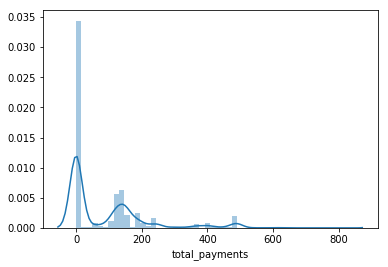

In [9]:
sns.distplot(tickets_SEIZ_only['total_payments'])

For this first graph, looks like most people on the boot list made no payments. Makes sense since you need 2-3 unpaid tickets to be eligible for them to boot your car.

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


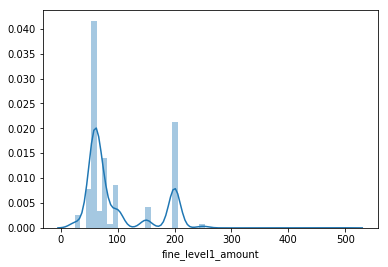

In [10]:
sns.distplot(tickets_SEIZ_only['fine_level1_amount'])

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


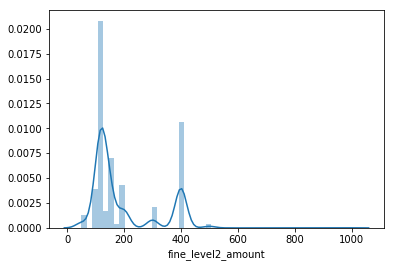

In [11]:
sns.distplot(tickets_SEIZ_only['fine_level2_amount'])

Ok, this is basically the same graph with the goals posts moved one length. So it looks like those on the boot list basically had their fine levels (or amount they had to pay) double between fine1 and fine2. 

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


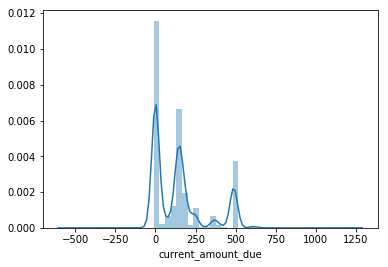

In [12]:
sns.distplot(tickets_SEIZ_only['current_amount_due'])

For current amount due, it looks like a lot of people just paid the fine (hence the 0), and got themselves off the boot list. But others owe anywhere from 125-ish up to 500. 

So Ed came up with a good idea to group the tickets by notice_number to find the ticket numbers that go with the SEIZ designation.

So we have a SEIZ dataset built, let's group it by notice_number, then tease out the ticket_numbers and what dates they were issued.

In [13]:

tickets_SEIZ_notice = tickets_SEIZ_only[['issue_date', 'ticket_queue_date','ticket_number', 'notice_number']].groupby(['notice_number']).nunique()
tickets_SEIZ_notice.sort_values(by=['ticket_number'], ascending=False)

,issue_date,ticket_queue_date,ticket_number,notice_number
notice_number,,,,
5177323210,13,10,13,1
5191576050,6,5,6,1
5187724250,6,1,6,1
5164931680,4,4,4,1
5184937740,4,3,4,1
5189428510,2,2,3,1
5191940730,3,3,3,1
5173530100,3,1,3,1
5184810680,3,1,3,1


Makes sense that issue_date matches up exactly with ticket_number, since each individual ticket has its own issue date. BUT I did see some non-matching ticket and issue date numbers when I first ran those (i.e. 3 counts of ticket numbers but only 2 issue dates. This would indicate multiple tickets on one day, which does happen).

ticket_queue_date should indicate the date they got a SEIZ notice, since this only have SEIZs in it.
However, it could also indicate another status update on the record, if the ticket_queue variable is something other than "Notice." ticket_queue can also be "Paid", "Dimissed", “Court”, “Bankruptcy”, “Hearing Req”, or “Define” per the data dictionary.


ticket_queue_date: when the “ticket_queue” was last updated.



In [14]:
#looking at the top one with 13 tickets and 10 ticket_queue_dates

scoff=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5177323210]
scoff.sort_values(by=['issue_date'], ascending=True)



,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
12498,65194981,2015-01-01 20:13:00,2 E 57TH ST,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,2,CPD,HOND,60,120,146.4,0.0,Notice,2015-01-14,SEIZ,NaN,5177323210,6365,"2 e 57th st, chicago, il"
26906,65595043,2015-01-02 02:35:00,6354 S KING DR,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-01-14,SEIZ,NaN,5177323210,13354,"6300 s king dr, chicago, il"
19827,65593802,2015-01-12 16:52:00,6362 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-02-11,SEIZ,NaN,5177323210,18779,"6300 s calumet, chicago, il"
34199,65752379,2015-02-27 16:20:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-04-01,SEIZ,NaN,5177323210,18462,"6400 s calumet, chicago, il"
12895,65748944,2015-02-28 16:45:00,6364 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-03-25,SEIZ,NaN,5177323210,16545,"6300 s calumet, chicago, il"
32783,65752408,2015-03-01 16:37:00,6363 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-03-25,SEIZ,NaN,5177323210,17443,"6300 s calumet, chicago, il"
9153,65642631,2015-03-12 19:33:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-04-22,SEIZ,NaN,5177323210,18779,"6400 s calumet, chicago, il"
14664,65843020,2015-03-31 17:41:00,6364 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-04-29,SEIZ,NaN,5177323210,16614,"6300 s calumet, chicago, il"
41781,65841097,2015-04-15 18:02:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-05-06,SEIZ,NaN,5177323210,17624,"6400 s calumet, chicago, il"
19503,65842995,2015-04-17 15:24:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-04-29,SEIZ,NaN,5177323210,6430,"6400 s calumet, chicago, il"


It looks like the scoff person is a catch-all for when the cops don't know who the person is. The license plate type is TMP for all of them and it's a lot of expired plates and missing city stickers. Probably not the best first example to pull. 

In [15]:
#looking at a regular person with 3 issue dates, 3 ticket numbers, and 1 ticket_queue date
regular_person=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5184810680]
regular_person.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
16617,65665694,2015-01-02 03:28:00,6240 S ARTESIAN,f27b26c3fcd18b7e717a6525b4adec9646c406a108979c...,IL,PAS,606363310,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,CPD,FORD,60,120,146.4,0.0,Notice,2015-10-08,SEIZ,NaN,5184810680,8661,"6200 s artesian, chicago, il"
41722,65607839,2015-01-19 21:09:00,6236 S ARTESIAN,f27b26c3fcd18b7e717a6525b4adec9646c406a108979c...,IL,PAS,606363310,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,CPD,FORD,60,120,146.4,0.0,Notice,2015-10-08,SEIZ,NaN,5184810680,2888,"6200 s artesian, chicago, il"
409,64716415,2015-01-23 19:13:00,6230 S ARTESIAN,f27b26c3fcd18b7e717a6525b4adec9646c406a108979c...,IL,PAS,606363310,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,CPD,FORD,60,120,146.4,0.0,Notice,2015-10-08,SEIZ,NaN,5184810680,7988,"6200 s artesian, chicago, il"


Ok this person fits more of an expected pattern. Got 3 tickets over 3 dates, but all in the same month (issue_dates all are in Jan 2015).

They all match up to one notice number with its ticket_queue_date of 10-8-2015. Looks like it took them about 7 months to go from getting the last ticket to updating this person's record to indicate they got the SEIZ notice (OR that the person hadn't paid in the 7 months? hard to say). 

So they could have gotten earlier notices about these 3 tickets, but still been on the boot list up until October. Or maybe this means they were on the boot list for 7 months without paying?

Let's look at another example.

In [16]:
#this is a person with 4 issue dates, 4 tickets, and 3 ticket_queue_dates (for 3 SEIZ notices?)
regular_person2=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5184937740]
regular_person2.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
24527,65595113,2015-01-28 16:03:00,6416 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-11,SEIZ,NaN,5184937740,10494,"6400 s eberhart, chicago, il"
46336,65751803,2015-02-09 16:59:00,7121 S STATE,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,17721,"7100 s state, chicago, il"
9873,65662181,2015-02-13 19:25:00,6414 S EBEHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,211,CPD-Other,PONT,60,120,146.4,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,11894,"6400 s ebehart, chicago, il"
29632,65592880,2015-02-27 11:08:00,6415 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,PONT,60,120,146.4,0.0,Notice,2015-03-11,SEIZ,NaN,5184937740,16130,"6400 s eberhart, chicago, il"


Hmmm...if they got one notice for these 4 tickets, then why is the ticket_queue_date different for each ticket? 

It seems that notice_number always matches up to ONE SEIZ notice, although the ticket_queue_date is different.

Maybe the t_q_d denotes the date they sent the first violation notice and isn't updated later when they add that ticket to the seizure notice?

Two theories:

1. Looking at this record closer, looks like this is a TMP license plate, so maybe they originally dind't know who it was and only later on put all the pieces together under one notice number when they realized it was the same car/person.

2. OR maybe it just seems that once someone gets on the bootlist, the recordkeepers just update the VIOL to SEIZ and over-write the previous entries.

In [21]:
#looking at a person with 2 issue dates, 1 T_Q_D, and 2 tickets.



regular_person2_1_2=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5177925220]
regular_person2_1_2.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
4498,65853886,2015-07-11 23:10:00,213 N CENTRAL,81ac4bfd23035aedb7b2acd7d3850987be9fd1fe7e3305...,IL,PAS,606474837,0964130A,PARK ALLEY,18,CPD,CHRY,150,300,366.0,0.0,Bankruptcy,2016-03-15,SEIZ,NaN,5177925220,6557,"200 n central, chicago, il"
45619,66222705,2015-07-30 07:33:00,3400 W ARMITAGE,81ac4bfd23035aedb7b2acd7d3850987be9fd1fe7e3305...,IL,PAS,606474837,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,CHRY,60,120,146.4,0.0,Bankruptcy,2016-03-15,SEIZ,NaN,5177925220,7125,"3400 w armitage, chicago, il"


Looks like this is someone who only got to 2 tickets on this notice because they already filed for bankruptcy?

This means each row is counted as its own observation when they are really connected by notice_number. 

So you can't say that the average time to pay a ticket is X, because it seems like they are overwriting the tickets with new values instead of making another row for the same ticket number.

**What I can say is that the average time to update the record is X. I think that is what ticket_queue_date really tells us so I'll explore that more next.

In [22]:
#create a copy of the SEIZ df so it can be manipulated
tickets_SEIZ=tickets_SEIZ_only.copy()

# Here, I'm exploring this idea by creating "ticket_time", which simply subtracts the last date the record was updated (ticket_queue_date) from the date the person got the ticket (issue date).

In [43]:
#create a variable that shows the time between ticket issue and notice (ticket_queue_date - issue_date)
tickets_SEIZ['ticket_time'] = tickets_SEIZ.ticket_queue_date - tickets_SEIZ.issue_date

tickets_SEIZ.sort_values(by=['ticket_time'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time
12342,9189538985,2015-10-18 15:08:00,5405 W FLETCHER,4dba0b78d8fd001bf6f52f0cde54fc5690484489be9df6...,MN,PAS,006063900,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,CHEV,75,150,183.00,0.00,Notice,2015-10-19,SEIZ,NaN,5195950730,1431,"5400 w fletcher, chicago, il",0 days 08:52:00
48133,9189623352,2015-11-16 11:39:00,129 W CERMAK ROAD,eec068af83dbddda9f81d891fd2d07698aedb1ade54b39...,IA,PAS,003030300,0964140B,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,498,DOF,DODG,100,200,244.00,0.00,Notice,2015-11-17,SEIZ,NaN,5195707000,734,"100 w cermak road, chicago, il",0 days 12:21:00
10465,9189757554,2015-12-21 10:59:00,1833 W OGDEN AV,50cb42b0dbbd7f4a0c7a7b5c125e609c670bc7d6e3e956...,IL,PAS,60623,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MITS,50,100,20.07,101.93,Notice,2015-12-22,SEIZ,NaN,5182213190,789,"1800 w ogden av, chicago, il",0 days 13:01:00
26125,9189479174,2015-10-15 09:33:00,6826 N OSCEOLA,f48b83bfe18bb9e547580d8eab788100f94a8f9ccb047a...,IL,PAS,606530000,0964040B,STREET CLEANING,498,DOF,CADI,60,120,120.00,0.00,Notice,2015-10-16,SEIZ,NaN,5070526880,716,"6800 n osceola, chicago, il",0 days 14:27:00
22412,9189287989,2015-09-09 08:39:00,106 W HURON ST,07a9352d9a7b8b19c469a02369c8010f07c7c334762d3b...,IL,PAS,60104,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,498,DOF,CHEV,65,130,158.60,0.00,Notice,2015-09-10,SEIZ,NaN,5147891120,96,"100 w huron st, chicago, il",0 days 15:21:00
6564,9189331560,2015-09-10 07:01:00,1365 N HUDSON,0d10e0c319820ff8b95697ac5ca32f4071577533b5927d...,IL,PAS,606101249,0964090E,RESIDENTIAL PERMIT PARKING,498,DOF,NISS,75,150,25.30,157.70,Notice,2015-09-11,SEIZ,NaN,5190759630,129,"1300 n hudson, chicago, il",0 days 16:59:00
723,9189644145,2015-11-14 21:50:00,2355 N CALIFORNIA AV,17a8111affcf213123826842ad41ef1ab0b797957e6896...,IL,PAS,60618,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,CHEV,50,100,122.00,0.00,Notice,2015-11-16,SEIZ,NaN,5174727260,1398,"2300 n california av, chicago, il",1 days 02:10:00
49875,9188450290,2015-01-26 17:04:00,825 N SEDGWICK,80f7b704d9050c77727e08b9885757451f4cb515201421...,IL,PAS,60651,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,NISS,200,400,488.00,0.00,Notice,2015-01-28,SEIZ,NaN,5189373820,766,"800 n sedgwick, chicago, il",1 days 06:56:00
701,9188610443,2015-03-16 16:46:00,1029 S PAULINA ST,c403d2c600cfac16b4018eee23a4771629bffaafce1fc7...,IL,PAS,606293609,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,TOYT,200,400,488.00,0.00,Notice,2015-03-18,SEIZ,NaN,5158503070,797,"1000 s paulina st, chicago, il",1 days 07:14:00
2283,9188638183,2015-04-20 16:37:00,542 N BROADWAY ST,76ac327335379ff2791f0828beb36fda4611d089840195...,IL,PAS,604801027,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,498,DOF,NISS,60,120,146.40,0.00,Notice,2015-04-22,SEIZ,NaN,5178414910,775,"500 n broadway st, chicago, il",1 days 07:23:00


Now that I have the time between folks getting a ticket that puts them on the boot list and their ticket_queue status getting updated, my first question is:

What's the average time between getting a ticket and getting a ticket status update (by category)?

In [44]:
#first convert ticket time to a time delta so we can take its mean
tickets_SEIZ['ticket_time'] = pd.to_timedelta(tickets_SEIZ['ticket_time'])


tickets_SEIZ['ticket_time']

1        17 days 06:51:00
4        90 days 07:34:00
8       414 days 01:14:00
9        22 days 00:36:00
15        7 days 14:35:00
28      249 days 08:50:00
33        8 days 02:16:00
34      915 days 09:21:00
43        6 days 23:34:00
59        9 days 07:53:00
72      112 days 08:49:00
74       15 days 04:47:00
79      194 days 13:50:00
82       11 days 05:05:00
92      883 days 06:15:00
94      541 days 13:26:00
97        1 days 14:06:00
99        7 days 13:44:00
115      12 days 05:39:00
121     292 days 00:10:00
131      12 days 16:25:00
133     163 days 14:12:00
135     146 days 13:34:00
137     516 days 11:08:00
138       5 days 04:20:00
142     129 days 11:13:00
154     261 days 13:41:00
160     746 days 16:41:00
166       7 days 11:56:00
168       2 days 15:34:00
               ...       
49824     8 days 00:45:00
49827    13 days 12:15:00
49830     2 days 14:04:00
49831   209 days 14:24:00
49838   233 days 16:30:00
49842   237 days 04:20:00
49843     7 days 13:22:00
49851   399 

In [45]:
#convert ticket time to an integer containing the number of days so we can process the average

tickets_SEIZ['ticket_time']=tickets_SEIZ['ticket_time'].dt.days.astype(int)
tickets_SEIZ['ticket_time']

1         17
4         90
8        414
9         22
15         7
28       249
33         8
34       915
43         6
59         9
72       112
74        15
79       194
82        11
92       883
94       541
97         1
99         7
115       12
121      292
131       12
133      163
135      146
137      516
138        5
142      129
154      261
160      746
166        7
168        2
        ... 
49824      8
49827     13
49830      2
49831    209
49838    233
49842    237
49843      7
49851    399
49859    186
49864    107
49866    944
49867     16
49875      1
49886    187
49890    466
49892     61
49899    333
49902    286
49910    177
49921      5
49931    146
49950     37
49951      6
49953    331
49955    397
49963    161
49966     80
49977      7
49988     18
49997    130
Name: ticket_time, Length: 9422, dtype: int64

In [46]:
#the average amount of ticket time (in days) for each ticket_queue category to be updated.

queue_time = tickets_SEIZ[['ticket_queue','ticket_time']].groupby(['ticket_queue']).mean()
queue_time

,ticket_time
ticket_queue,
Bankruptcy,584.751445
Dismissed,325.242424
Notice,51.178415
Paid,390.045767


Above we have a nice table showing the average amount of days it took for each ticket category to be updated. 

It took just an average of 51 days from getting a ticket for the notice of a boot to be updated in the record. 

However, if you're on the boot list, it takes an average of almost 2 years after getting the tickets until your record is updated as a bankruptcy. 

Let's put that into context by looking at the average times for the whole set of boot notice tickets.

In [47]:
#putting the above into context

tickets_SEIZ.describe()

,ticket_number,unit,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,notice_number,ticket_time
count,9.422000e+03,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9.422000e+03,9422.000000
mean,4.360233e+09,270.497665,97.805137,195.610274,144.427036,86.334745,5.167914e+09,207.682233
std,4.553993e+09,249.964399,59.047440,118.094880,168.564641,125.597756,4.400271e+07,275.392831
min,6.391227e+07,1.000000,25.000000,50.000000,-538.820000,0.000000,5.012610e+09,0.000000
25%,6.588702e+07,10.000000,60.000000,120.000000,0.000000,0.000000,5.168582e+09,10.000000
50%,6.650438e+07,412.000000,65.000000,130.000000,146.400000,0.000000,5.186435e+09,71.000000
75%,9.189029e+09,498.000000,150.000000,300.000000,183.000000,146.400000,5.192053e+09,342.000000
max,9.189860e+09,792.000000,500.000000,1000.000000,1220.000000,816.000000,5.213794e+09,1226.000000


So here it looks like the overall mean (average) ticket_time is 207 days, and the 50%ile is 71 days. It seems like overall these records take a long time to be updated with a change in status.

Weird that the record actually is updated more slowly than average when the tickets end up being paid. That means either people take longer to pay than they do to get a ticket boot notice or to get a ticket dismissed (which makes sense, since most would probably wait to see if you really have to pay before paying), or that they just update the record more slowly in those cases.

My final question: If someone has a temporary license plate (indicating the authorities may be less clear on who they are), does it take longer for their reocrd to get updated vs. someone who has known, registered plates?

In [50]:

#can't get on the SEIZ list if they don't know who you are
#wanna look at those who had a temporary license plate, and if their ticket times are greater.

SEIZ_TMP=tickets_SEIZ[tickets_SEIZ.license_plate_type=="TMP"]


queue_time_TMP = SEIZ_TMP[['ticket_queue','ticket_time']].groupby(['ticket_queue']).mean()
queue_time_TMP 

,ticket_time
ticket_queue,
Bankruptcy,516.047619
Dismissed,276.000000
Notice,43.828496
Paid,540.750000


In [52]:
#here's the comparison one for those who have license plates

SEIZ_PAS=tickets_SEIZ[tickets_SEIZ.license_plate_type=="PAS"]
queue_time_PAS = SEIZ_PAS[['ticket_queue','ticket_time']].groupby(['ticket_queue']).mean()
queue_time_PAS 

,ticket_time
ticket_queue,
Bankruptcy,594.639175
Dismissed,340.296296
Notice,53.066225
Paid,384.919313


Ok, temp license plates have shorter average times to get "bankruptcy", "dismissed", and "notice" record updates.

The only area where regular license plates have a shorter update time is in paying the ticket ("paid" updates). That's also the only place where the two are markedly different, which may make sense since if they know who you are and you're registered, you're more likely to pay faster than someone whose identity may be somewhat unknown. OR the authories are more likely to update your record faster if they know who you are. :)

